## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
# 設定超參數
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.25, 0.5]

In [7]:
results = {}

import itertools
for ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout Ratio = %.2f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "EXP-Dropout Ratio-%s" % (str(ratio))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Dropout Ratio = 0.10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)   

Epoch 1/50



196/196 [==============================] - 3s 14ms/step - loss: 1.9843 - accuracy: 0.2758 - val_loss: 1.7778 - val_accuracy: 0.3511
Epoch 2/50
196/196 [==============================] - 3s 13ms/step - loss: 1.7804 - accuracy: 0.3574 - val_loss: 1.6712 - val_accuracy: 0.4069
Epoch 3/50
196/196 [==============================] - 2s 13ms/step - loss: 1.6994 - accuracy: 0.3898 - val_loss: 1.6276 - val_accuracy: 0.4194
Epoch 4/50
196/196 [==============================] - 3s 14ms/step - loss: 1.6498 - accuracy: 0.4101 - val_loss: 1.5876 - val_accuracy: 0.4246
Epoch 5/50
196/196 [==============================] - 3s 13ms/step - loss: 1.6068 - accuracy: 0.4230 - val_loss: 1.5274 - val_accuracy: 0.4591
Epoch 6/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5817 - accuracy: 0.4329 - val_loss: 1.5118 - val_accuracy: 0.4601
Epoch 7/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5477 - accuracy: 0.4464 - val_loss: 1.4825 - val_accuracy: 0.4721
Epoch 8/50

Epoch 1/50
196/196 [==============================] - 10s 44ms/step - loss: 2.0649 - accuracy: 0.2366 - val_loss: 1.8700 - val_accuracy: 0.3288
Epoch 2/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8812 - accuracy: 0.3165 - val_loss: 1.7621 - val_accuracy: 0.3750
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8308 - accuracy: 0.3349 - val_loss: 1.7249 - val_accuracy: 0.3680
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7879 - accuracy: 0.3504 - val_loss: 1.6689 - val_accuracy: 0.4062
Epoch 5/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7493 - accuracy: 0.3663 - val_loss: 1.6562 - val_accuracy: 0.4104
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 1.7279 - accuracy: 0.3765 - val_loss: 1.6448 - val_accuracy: 0.4088
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 1.7146 - accuracy: 0.3810 - val_loss: 1.6347 - val_accuracy: 0.426

Epoch 1/50
196/196 [==============================] - 7s 29ms/step - loss: 2.2252 - accuracy: 0.1602 - val_loss: 2.0144 - val_accuracy: 0.2556
Epoch 2/50
196/196 [==============================] - 4s 21ms/step - loss: 2.0675 - accuracy: 0.2157 - val_loss: 1.9817 - val_accuracy: 0.2748
Epoch 3/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0442 - accuracy: 0.2181 - val_loss: 2.0094 - val_accuracy: 0.2727
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0175 - accuracy: 0.2257 - val_loss: 1.9843 - val_accuracy: 0.2778
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0110 - accuracy: 0.2323 - val_loss: 2.0097 - val_accuracy: 0.2810
Epoch 6/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0000 - accuracy: 0.2375 - val_loss: 1.9674 - val_accuracy: 0.2815
Epoch 7/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9961 - accuracy: 0.2346 - val_loss: 1.9732 - val_accuracy: 0.2652

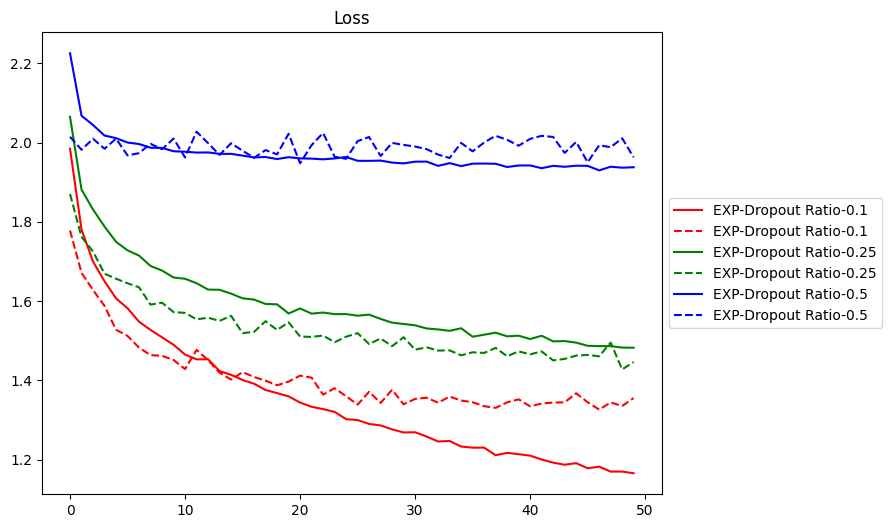

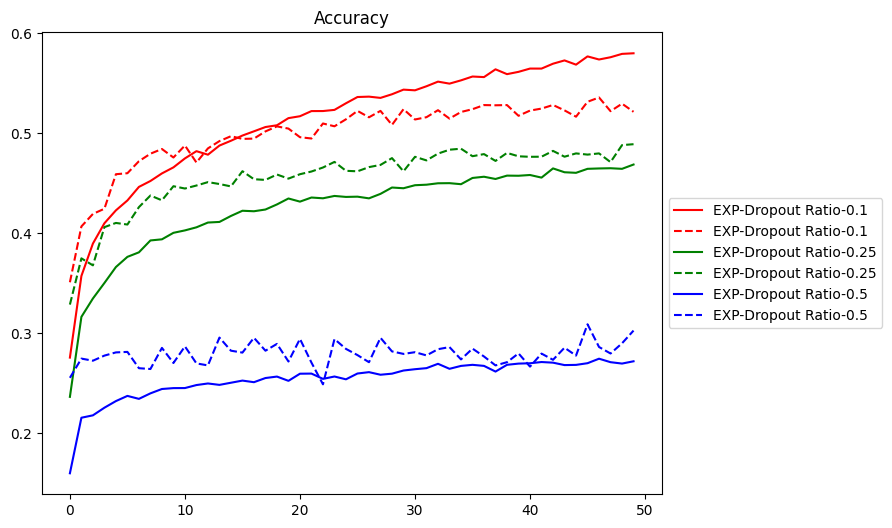

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 